# MPyC Tutorial
by Niek J. Bouman, 2018

## Optionally: install MPyC via pip:
You need the pip that belongs to Python3; maybe it is called, e.g, `pip3` or `pip-3.6` on your system.

In [ ]:
!pip install --user mpyc

## Loading the MPyC package and some initialization

In [ ]:
from mpyc.runtime import mpc    # load MPyC
secint = mpc.SecInt()           # 32-bit secure MPyC integers

### A simple "Hello World" test: multiply two secints, and reveal the result

In [ ]:
x = secint(3)
y = secint(5)

z = x*y
f = mpc.output(z)
mpc.run(f)

### Understanding the system

What is the type of `z`?

What is the type of f?

What happens if you try to run `f` again?

In [ ]:
mpyc.run(f)

### Mixing secret and public values

In [ ]:
x = secint(4)
y = 7

z = x*y
mpc.run(mpc.output(z))

Is `z` a public or secret value?

## Performance of Basic Operations
We will compare the performance of operations like addition, multiplication and comparison; between (a) ordinary ("non-secret") python integer object (or numpy arrays) and (b) `secint` types.

In [ ]:
import random
import timeit

### Addition

Addition of many numbers (using `numpy`)

In [ ]:
import numpy as np

N = 100000
X = np.random.randint(0,2**32, N)

start = timeit.default_timer()
Z=np.sum(X)
print(timeit.default_timer() - start, "seconds")

Addition, but then using `secint` types 

In [ ]:
N = 100000
X = [secint(random.randint(0,2**32-1)) for _ in range(N)]

start = timeit.default_timer()

Z=mpc.sum(X)
mpc.run(mpc.output(Z))

print(timeit.default_timer() - start, "seconds")

What is your conclusion?

### Multiplication

In [ ]:
import numpy as np

N = 10000
X = np.random.randint(0,2**32, N)
Y = np.random.randint(0,2**32, N)

start = timeit.default_timer()

Z=np.dot(X,Y)

print(timeit.default_timer() - start, "seconds")

In [ ]:
N = 100000
X = [secint(random.randint(0,2**32-1)) for _ in range(N)]
Y = [secint(random.randint(0,2**32-1)) for _ in range(N)]

start = timeit.default_timer()

Z=mpc.in_prod(X,Y)
mpc.run(mpc.output(Z))

print(timeit.default_timer() - start, "seconds")

### Integer Comparisons

In [ ]:
import numpy as np

N = 10000
X = np.random.randint(0,2**32,1000)
Y = np.random.randint(0,2**32,1000)

start = timeit.default_timer()

Z = X < Y

print(timeit.default_timer() - start, "seconds")

In [ ]:
N = 10000

X = [secint(random.randint(0,2**32-1)) for _ in range(N)]
Y = [secint(random.randint(0,2**32-1)) for _ in range(N)]

start = timeit.default_timer()

Z=[x < y for (x,y) in zip(X,Y)]
output = mpc.run(mpc.output(Z))

print(timeit.default_timer() - start, "seconds")

### (Re-)Run the benchmarks above for various values of N, and make a table and a plot in which you compare the absolute and relative running speeds of the different operations. What is your conclusion?

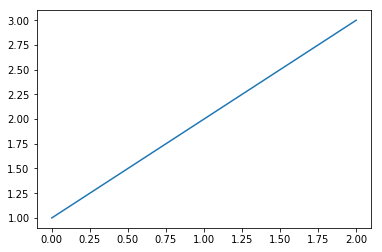

In [3]:
# in this way you get a plot inside Jupyter

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1,2,3])

## Experimenting with Division
Run the following code: 

In [ ]:
x = secint(10)
y = secint(2)
mpc.run(mpc.output(x/y))

Now run this code:

In [ ]:
x = secint(2)
y = secint(3)
z = mpc.run(mpc.output(x/y))
print(z)

Can you explain the result above?

Run the code below and explain what happens

In [ ]:
mpc.run(mpc.output(z*y))

Recall from the lecture that we are working in a __finite field__ (more precisely, a prime-order field)

In [ ]:
secint.field

Now, have a look at:
https://en.wikipedia.org/wiki/Modular_multiplicative_inverse

Can you reproduce the value z without making use of the "`/`"-operator? (Hint: use `mpc.reciprocal(y)`, which computes the multiplicative inverse of `y`)

Now, you can continue with `SecretSantaExplained.ipynb` and `SortingNetworksExplained.ipynb` which can be found in the `/demos` directory of the MPyC installation.

_After_ reading through the `SecretSantaExplained` notebook, try the following assignment 

## Assignment
Currently, as a proof of concept, the SecretSanta program outputs derangements on {1, ..., $n$} for increasing values of $n$, and moreover, it outputs the entire derangement to all parties. 
For a practical deployment, you would need to slightly modify the program:
 - you only need to sample one derangement on the set {1, ... , N}, where N is the number of parties
 - you should only output the $i$-th part of the derangement to player $i$
 

_Can you make SecretSanta more realistic, by applying those two modifications ?_